# Importando as Libs Necessárias

Nessa parte são realizadas as importações das bibliotecas gerais de utilização do projeto. Bibliotecas específicas serão importadas à medida em que forem sendo utilizadas durante o projeto.

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importando e visualizando os dados
Os dados do nosso projeto são fornecidos em .csv, isto é, comma-separated values, ou seja, valores separados por vírgula. Nesse tipo de arquivo, cada vírgula representa uma separação de coluna, e cada "enter" ou "quebra de linha" representa uma nova linha. Para realizar a leitura/importação do arquivo, utilizaremos uma função do pandas chamada read_csv, que recebe o nome do arquivo e o diretório e importa os dados para um tipo especial de estrutura de dado chamado DataFrames. DataFrames são estruturas matriciais de dados com os eixos indicados por nomes, tanto as colunas como as linhas. Eles possuem muitos métodos interessantes que serão abordados ao longo do curso.

- Para visualizar a forma dos dados, utilizaremos o atributo shape, que retorna uma tupla com o número de linhas e colunas do nosso dado.
- Para visualizar as 5 primeiras amostras dos nossos dados, utilizaremos um método chamado head.

In [102]:
caminho_arquivo = "/home/gabriel/anaconda3/stairway_to_clustering/Wine.csv"
df = pd.read_csv(caminho_arquivo) #importando os dados
print("O dado possui",df.shape[0], "amostras e", df.shape[1], "atributos")
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


A ideia do projeto é clusterizar os vinhos em segmentos de consumidores. O último atributo dos dados é exatamente isso, de tal forma, devemos remove-lo. Para fazer isso, podemos utilizar uma função dos DataFrames chamada \textbf{drop}, que recebe o nome da coluna ou linha a ser deletada.

In [103]:
labels_df = df['Customer_Segment']
df = df.drop(columns = 'Customer_Segment')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Caso conhecessemos os dados previamente e soubessemos que a ultima coluna era a dos labels que não nos importa no momento, poderíamos tê-lo importado sem essa coluna, utilizando a seguinte linha de código:

df = pd.read_csv('Wine.csv', usecols=[i for i in range(12)])

Como nossas colunas estão todas em inglês, podemos traduzir as mais legíveis (aquelas que não são substâncias químicas doidas) para o português


In [104]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Pó', 'Ash_Alcalinity': 'Alcalinidade_pó', 'Magnesium' : 'Magnésio','Total_Phenols' : 'Total_Fenóis','Nonflavanoid_Phenols':'Fenóis_nãoflavlonóides','Color_Intensity':'Intensidade de cor'})
colunas = df.columns
colunas

Index(['Alcool', 'Malic_Acid', 'Pó', 'Ash_Alcanity', 'Magnésio',
       'Total_Fenóis', 'Flavanoids', 'Fenóis_nãoflavlonóides',
       'Proanthocyanins', 'Intensidade de cor', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Análise Básica dos Dados

Uma primeira análise interessante para se realizar é analisar as informações estatísticas do dado. Para fazer isso, podemos utilizar o atributo "describe", dos dataframes.
,

In [105]:
df.describe()

,Alcool,Malic_Acid,Pó,Ash_Alcanity,Magnésio,Total_Fenóis,Flavanoids,Fenóis_nãoflavlonóides,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Analisando essas informações sem muito esforço, podemos perceber que Total_fenóis e Flavanoids são parecidos. Muitas outras análises simples podem ser realizadas em cima desses dados apresentados.

## Análise de Correlação

Uma segunda análise interessante para se fazer com os dados é a utilização de uma matriz de correlação. A matriz de corrlação apresenta o quanto os atributos estão relacionados entre si de maneira proporcional. Isto é, o quanto os atributos crescem ou diminuem juntos, ainda mais o quanto a forma dos atributos se parece. Para fazer isso, iremos utilizar uma biblioteca chamada biokit, que possui várias ferramentas estatísticas interessantes com gráficos bonitos.

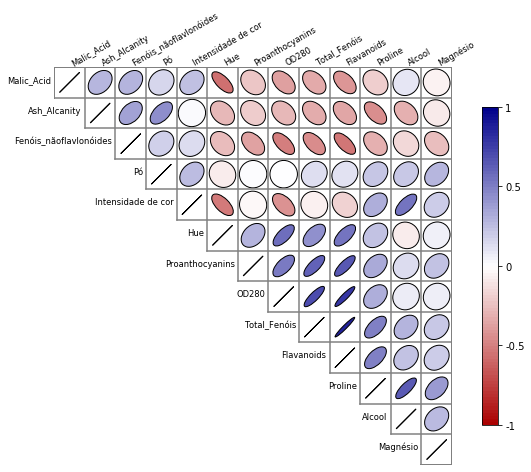

In [106]:
from biokit.viz import corrplot
matriz_corr = df.corr()
c = corrplot.Corrplot(matriz_corr)
c.plot(upper = 'ellipse')
fig = plt.gcf()
fig.set_size_inches(10, 8);

Quanto mais próximo de uma linha reta, mais se parecem os atributos. A diagonal da matriz, como é possível perceber, é composta por linhas retas, porque ela compara atributos iguais. A partir da matriz de correlação é possível perceber algumas coisas interessantes, como por exemplo que os atributos Flavanoids e Total_phenols estão muito relacionados, confirmando o que percebemos ao utilizar o método describe. Isso pode ser visualizado com mais clareza na figura abaixo

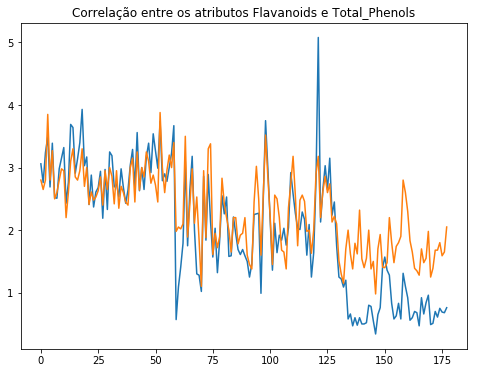

In [107]:
plt.plot([i for i in range(len(df['Flavanoids']))], df['Flavanoids'],[i for i in range(len(df['Flavanoids']))],df['Total_Fenóis'])
plt.title("Correlação entre os atributos Flavanoids e Total_Phenols")
fig = plt.gcf()
fig.set_size_inches(8, 6);
plt.show()


Como é possível perceber, a forma dos dois atributos parece muito. Isso significa que os dois causam influência semelhante na clusterização/agrupamento, porque são parecidos. Assim sendo, podemos pensar em descartar um deles caso seja necessário. Como veremos adiante, alguns algoritmos de clusterização não respondem muito bem a dados com muitos atributos, ou por problema de convergência (levam muito tempo para convergir ou simplesmente não convergem) ou por problemas de precisão (se tornam mais imprecisos a medida que a quantidade de atributos aumenta)

Uma outra forma de visualizar essa relação é utilizando cada um dos atributos como um eixo na figura. Como eles tem um alto grau de correlação, deveremos ver algo semelhante a uma linha reta.

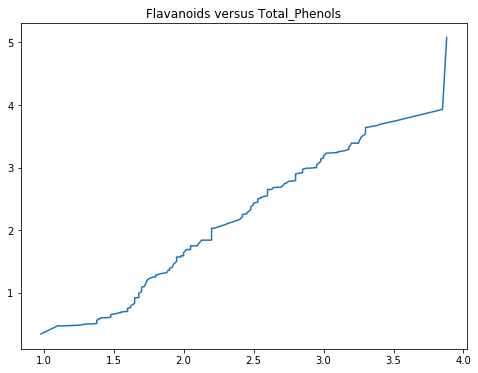

In [108]:
plt.plot(df['Total_Fenóis'].sort_values(),df['Flavanoids'].sort_values())
plt.title("Flavanoids versus Total_Phenols")
fig = plt.gcf()
fig.set_size_inches(8,6)

Como já mencionado, atributos com alta correlação contribuem de forma redundante para a clusterização. É possível perceber na matriz de correlação que ainda existem mais atributos com um alto grau de correlação que também podem ser explorados para diminuir ainda mais a complexidade do nosso dado sem prejudicar o nosso agrupamento. 

Dados com valores de correlação próximos de zero são fundamentais para clusterização. Enquanto atributos semelhantes contribuem pouco individualmente, atributos diferentes contribuem muito, porque guardam muita informação não redundante. Um exemplo de dois atributos com baixa correlação pode ser visualizado na imagem abaixo:


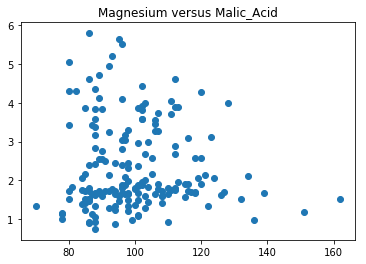

In [109]:
plt.scatter(df['Magnésio'], df['Malic_Acid'])
plt.title('Magnesium versus Malic_Acid')
plt.show()

Como é possível perceber, a relação entre esses atributos é quase inexistente, de tal modo podemos considerar a principio que ambos contém informação relevante.

O próximo passo é normalizar os dados, ou seja, tornar os atributos comparáveis. Essa parte é extremamente importante, porque ela torna os atributos comparáveis

In [110]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df))
df.columns = colunas
df.head()

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Alcool,Malic_Acid,Pó,Ash_Alcanity,Magnésio,Total_Fenóis,Flavanoids,Fenóis_nãoflavlonóides,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


Para facilitar as análises dos agrupamentos, vamos criar duas funções, uma para desenhar gráficos e outra para avaliar a clusterização com os agrupamentos feitos pelo especialista. 

In [155]:
def desenha_grafico(x, y, xc,yc, cluster_labels, titulo):
    xdf = pd.DataFrame(x) #para manter o nome da coluna
    ydf = pd.DataFrame(y) # para manter o nome da coluna
    xc = pd.DataFrame(xc) #para manter o nome da coluna
    yc = pd.DataFrame(yc) # para manter o nome da coluna
    plt.scatter(x, y, c = cluster_labels.astype(np.float))
    plt.scatter(xc, yc, c = 'r', marker = 'X', s = 80)
    lx = list(xdf.columns)
    ly = list(ydf.columns)
    plt.xlabel(lx)
    plt.ylabel(ly)
    plt.title(titulo)
    plt.show()

def avalia_resultado(labels_reais, labels_clusterizados):
    total = 0
    for i in range(len(labels_reais)):
        if(labels_reais[i] != labels_clusterizados[i]):
            total += 1
    total /= len(labels_reais)
    return (1-total)*100    
    
def troca_label(x, a, b, c):
    x = pd.DataFrame(x).replace(a,4)
    x = x.replace(b,5)
    x = x.replace(c,2)
    x = x.replace(4,0)
    x = x.replace(5,1)
    return x

# K - Means

Para a primeira abordagem do K-means, vamos considerar que você é um especialista em mercado de vinhos e sabe que existem 3 grandes grupos de consumidores. Assim sendo, você sabe que o número de clustereres será 3.

Vale lembrar que a ideia desse algoritmo de agrupamento é minimizar a média das distâncias (L0, L1, L2.. LN ou qualquer outra que possa surgir na cabeça de um matemático louco) entre o cluster e os pontos pertencentes a ele. Assim sendo, seu resultado depende muito de como cada cluster é iniciado. Além disso, as centróides acabam por convergir para mínimos locais, uma vez que tendem a ficar confinadas próximas da região onde são iniciadas.

Para a Clusterização com K-means, utilizaremos a biblioteca do scikit-learn. 

In [156]:
from sklearn.cluster import KMeans
agrupador = KMeans(n_clusters=3, random_state = 0)
agrupador.fit(df) #Explicar cada parâmetro do KMeans

#labels do dado completo (com todas as colunas)
labels_df_completo = agrupador.labels_

#centróides de cada cluster
centroides = pd.DataFrame(agrupador.cluster_centers_)
centroides.columns = colunas
centroides.head()

,Alcool,Malic_Acid,Pó,Ash_Alcanity,Magnésio,Total_Fenóis,Flavanoids,Fenóis_nãoflavlonóides,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline
0,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894
1,0.544689,0.478441,0.560136,0.538332,0.311462,0.244765,0.107135,0.618525,0.228276,0.482640,0.192550,0.160906,0.247400
2,0.311375,0.236899,0.472917,0.499917,0.247721,0.453059,0.382401,0.411747,0.397425,0.147735,0.473512,0.588976,0.156401


Como é possível perceber, os dados foram clusterizados com sucesso em três clústeres bem definidos. Para analisar os clústeres, podemos selecionar dois ou três atributos que pareçam fazer sentido serem analisados juntos para ver como a clusterização ficou distribuida. Isso ajuda a enxergar visualmente mesmo quando os dados possuem dimensão acima da R3, como é o nosso caso. 

Por exemplo, peguemos a densidade e a cor. 

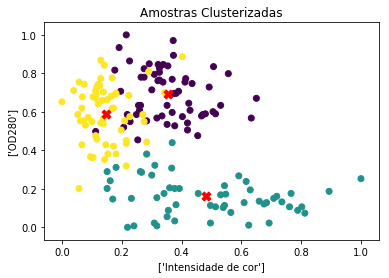

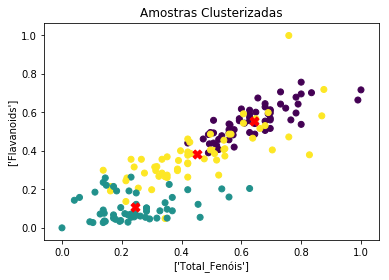

In [157]:
desenha_grafico(df['Intensidade de cor'], df['OD280'], centroides['Intensidade de cor'], centroides['OD280'], 
                agrupador.labels_, "Amostras Clusterizadas")


desenha_grafico(df['Total_Fenóis'], df['Flavanoids'], centroides['Total_Fenóis'], centroides['Flavanoids'], 
                agrupador.labels_, "Amostras Clusterizadas")

Como é possível perceber, alguns clústeres estão sobrepostos em algumas partes. Isso ocorre devido ao fato da vista em 2D de algo de maior dimensão ser apenas uma projeção (sombra). Sendo apenas uma projeção, estas podem se sobrepor sem que o objeto esteja sobreposto, como é o caso da sombra de duas pessoas que se sobrepõe sem que as pessoas estejam sobrepostas na prática. Porém é possível ter uma noção da localização dos clústeres. 

Para avaliar os resultados, iremos utilizar a função que criamos. Além disso, antes de analisar os resultados, precisamos dar o mesmo "nome" para os clústeres, de modo que a comparação seja correta. Para ral, podemos utilizar a função replace, dos dataframes

In [158]:
labels_df_completo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

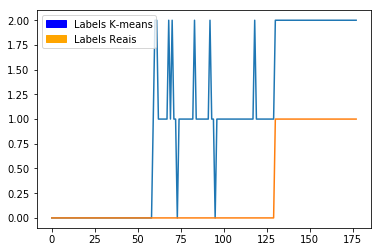

Porcentagem de acertos igual a 34.269662921348306


In [159]:
import matplotlib.patches as mpatches
labels_df_completo = troca_label(labels_df_completo, 0, 2, 1)
labels_df = troca_label(labels_df, 1, 2, 3)
plt.plot(labels_df_completo)
plt.plot(labels_df)
patch_df_completo = mpatches.Patch(color='blue', label='Labels K-means')
patch_df = mpatches.Patch(color='orange', label='Labels Reais')
plt.legend(handles=[patch_df_completo, patch_df])

plt.show()

print("Porcentagem de acertos igual a", avalia_resultado(np.array(labels_df_completo),np.array(labels_df)))

Como podemos perceber, a precisão adquirida foi grande para um algoritmo tão simples.

## Explorando a inicialização do K-means (K-means ++)

Como a convergência e a qualidade dos clústeres formados pelo K-means depende da inicialização, um dos parâmetros mais importantes é a inicialização dos centróides. Como default, o algoritmo do sklearn utiliza o K-means ++, que seleciona os primeiros centróides baseados em pontos do dataset (também conhecidos como medoids, conceito que será apresentado na próxima aula). Isso faz com que o algoritmo convirja mais rápido e com que o resultado possua uma melhor localização das centróides, ou seja, uma melhor qualidade dos clústeres! 

Na prática, quando os dados podem ser classificados sem muita dificuldade
Caso inicializemos como random, podemos ter resultados diferentes. 

In [160]:
agrupador_aleat = KMeans(n_clusters=3, init = 'random', random_state = 10)
agrupador_aleat.fit(df) #Explicar cada parâmetro do KMeans

#labels do dado completo (com todas as colunas)
labels_df_aleat = agrupador_aleat.labels_

#centróides de cada cluster
centroides_aleat = pd.DataFrame(agrupador_aleat.cluster_centers_)
centroides_aleat.columns = colunas


print(centroides)
print(centroides_aleat)
labels_df_aleat = troca_label(labels_df_aleat, 2, 0, 1)
print("Porcentagem de acertos igual a", avalia_resultado(np.array(labels_df_aleat),np.array(labels_df)))

     Alcool  Malic_Acid        Pó  Ash_Alcanity  Magnésio  Total_Fenóis  \
0  0.705651    0.248429  0.584904      0.344431  0.410727      0.642114   
1  0.544689    0.478441  0.560136      0.538332  0.311462      0.244765   
2  0.311375    0.236899  0.472917      0.499917  0.247721      0.453059   

   Flavanoids  Fenóis_nãoflavlonóides  Proanthocyanins  Intensidade de cor  \
0    0.554679                0.300340         0.477272            0.355340   
1    0.107135                0.618525         0.228276            0.482640   
2    0.382401                0.411747         0.397425            0.147735   

        Hue     OD280   Proline  
0  0.477809  0.690386  0.593894  
1  0.192550  0.160906  0.247400  
2  0.473512  0.588976  0.156401  
     Alcool  Malic_Acid        Pó  Ash_Alcanity  Magnésio  Total_Fenóis  \
0  0.311375    0.236899  0.472917      0.499917  0.247721      0.453059   
1  0.544689    0.478441  0.560136      0.538332  0.311462      0.244765   
2  0.705651    0.248429  

Para esse exemplo, as diferenças foram sutis, principalmente porque os dados estão bem espaçados. Porem em alguns casos, onde os clústeres estão mais próximos esse tipo de situação pode levar a agrupamentos diferentes!
Outra forma de utilização interessante para o K-means++ é inicializar outros algoritmos de clusterização, como o k-medians e o k-medoids, que serão apresentados nas próximas aulas.

#### Diminuindo o número de atributos baseando-se na  matriz de correlação (Bonus)

Como vimos anteriormente, atributos com alta correlação possuem informação redundante. Assim, podemos descartar um deles. O exemplo abaixo descarta a coluna Flavanoids e faz o teste para esse dado com menor complexidade.

In [161]:
df2 = df.drop(columns = 'Flavanoids')
agrupador = KMeans(n_clusters=3, random_state = 10)
agrupador.fit(df2) #Explicar cada parâmetro do KMeans
agrupador.labels_
agrupador.cluster_centers_

array([[0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.30034024, 0.47727155, 0.35534046, 0.47780888,
        0.69038612, 0.59389397],
       [0.55371517, 0.50736263, 0.56558666, 0.54851425, 0.3115942 ,
        0.24273158, 0.60747318, 0.23213954, 0.50808071, 0.17232584,
        0.15628816, 0.24326592],
       [0.31854067, 0.22918912, 0.47399125, 0.49437676, 0.25148221,
        0.44200627, 0.43281875, 0.38418889, 0.14837367, 0.47211136,
        0.56660007, 0.16511045]])

In [162]:
print(np.array(labels_df_completo).T)
print(agrupador.labels_)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 1 1 1 2 1 2 1
  1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Como é possível perceber, mesmo removendo um atributo o resultado ficou muito próximo, o que comprova a tese de que atributos semelhantes possuem informação redundante.

In [163]:
labels_df_2 = troca_label(agrupador.labels_, 0, 2, 1)

print(avalia_resultado(np.array(labels_df_2), np.array(labels_df)))
print(np.array(labels_df).T - np.array(labels_df_2).T) #transpor por causa da forma
print(1-5/len(labels_df)) # o resultado deve ser igual o da função, só para mostrar que deu certo.

34.269662921348306
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
0.9719101123595506


O resultado encontrado foi melhor que o esperado. Isso dá-se devido especialmente à diminuição da redundância dos dados, que faz com que os clústeres fiquem mais livres para movimentar-se para o local ideal. 

Como último experimento para o K-means, iremos adicionar dois outliers ao nosso dado. Isso para verificarmos o desempenho do método quando há presença de pontos fora da curva. Vamos mais uma vez utilizar o describe:

## Fraquezas do K-means

-> Por utilizar a média, é muito sensível a dados fora do padrão. Um exemplo clássico é: imagine se o Sílvio Santos fosse morar em uma cidade extremamente pobre do interior do Maranhão, que tem 10000 habitantes que ganham um salário de 800 reais. Ao mudar para lá, ele elevaria a renda média per capta para valores absurdos. Porém, a população ainda estaria passando fome e ganhando pouco. Isso porque a média sofre muito com dados fora do padrão.

-> Tende a convergir para mínimos locais, uma vez que as centróides tendem a ficar próximas dos pontos de sua inicialização, não tendo muita mobilidade.

-> Para uma quantidade grande clústeres e dados, o método é lento, uma vez que acaba por executar o "loop de clusterização" uma vez para cada amostra.

 **NO MUNDO REAL, NEM TODOS OS DADOS PODEM SER AGRUPADOS POR REGIÕES CIRCULARES!!**.

# Tarefa K-means

Agora é a sua vez. Através da análise da matriz de correlação, selecione mais um atributo que você acredita que pode ser removido do dado. Após isso, realize o agrupamento com o K-means, comparando o resultado gerado com a clusterização utilizando todos os atributos e a clusterização com os atributos que você removeu. Depois disso, compare a classificação dos dados nos clústeres gerados com o K-means com a classificação real dos dados. O atributo que você removeu era realmente importante?

# DBSCAN

Como não conseguimos definir com precisão a estrutura de agrupamento dos nossos dados, devemos tentar aplicar amis técnicas. O resultado apresentado pela utilização do K-means foi bom, porém talvez possamos melhorá-lo. A ideia é sempre tentar aplicar técnicas com abordagem diferente.

In [164]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')

In [165]:
agrupador.fit(df)

DBSCAN(algorithm='auto', eps=1.31, leaf_size=30, metric='manhattan',
    metric_params=None, min_samples=15, n_jobs=None, p=None)

In [166]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

O valor "-1" significa que o ponto não foi clusterizado. O valor 0, significa que o ponto pertence ao cluster 0 e assim por diante. É interessante notar que a clusterização foi ruim, e o que o algoritmo agrupou em três grupos, e um grupo de ruído.

O valor de eps é basicamente a distância tolerável para que um ponto possa ser considerado vizinho de outro. Quanto menor o eps, mais próximos os pontos devem estar. Nesse contexto, o DBSCAN é bem frágil. Muitas vezes a parametrização desse valor não é simples. Existem algoritmos recentes para estimar eps de modo a que o máximo de valores possíveis possam ser clusterizados. 

Na prática, quanto maior for o domínio do cientista de dados em relação as amostras mais fácil ele irá "tunar" os parâmetros do DBSCAN. É necessário analisar se os resultados dos clústeres fazem sentido lógico.




A métrica de distância é um ponto importante dos algoritmos. Ela define o critério de distância que será considerado entre os pontos. Nesse contexto, o DBSCAN é bastante versátil, podendo ser utilizadas várias métricas.

Se o valor de eps for muito pequeno, o resultado será o apresentado abaixo:

In [167]:
agrupador = DBSCAN(eps = 0.01, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Todos os dados foram considerados outliers :OOOOOOOOOOOOO.
Caso o valor de eps seja muito grande, vem:

In [168]:
agrupador = DBSCAN(eps = 10, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Todos os dados foram agrupados apenas em um clúster!!!!!!!!
O resultado é o inverso com min_samples. Se min_samples for muito pequeno, todas as amostras seram consideradas no mesmo clúster. Se min_samples for muito grande, nenhuma amostra será clusterizada!!!!

## Tarefa DBSCAN1

Faça o teste acima. Utilize um valor grande de min_samples e um valor pequeno. Qual o valor de transição de todos os dados em um cluster para o aparecimento de mais clústeres?

Uma habilidade muito interessante do DBSCAN é a capacidade de utulizar várias métricas de distância diferentes. Isso implica diretamente no resultado dos clústeres. Utilizando agora uma distância euclidiana, isto é, a distância em linha reta, vem:

In [169]:
agrupador = DBSCAN(eps = 0.479, min_samples = 15, metric = 'l2')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  0, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2])

A precisão pode ser calculada por

In [170]:
print(avalia_resultado(np.array(agrupador.labels_), np.array(labels_df)))

30.33707865168539


A precisão baixa ocorreu devido à constituição dos nossos dados. Por mais que eles sejam densos, a separação entre as regiões de alta densidade não é clara. É possível ajustar ainda mais os parâmetros, porém o resultado não mudará tanto.

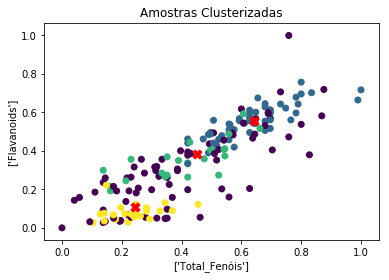

In [171]:
desenha_grafico(df['Total_Fenóis'], df['Flavanoids'], centroides['Total_Fenóis'], centroides['Flavanoids'], 
                agrupador.labels_, "Amostras Clusterizadas")

Na prática, uma das conclusões possíveis sobre a utilidade do DBSCAN é a seguinte: Clústeres densos, possuindo qualquer formato porém com separação clara entre si. Ele também pode ser utilizado para fazer um tratamento inicial dos dados, como por exemplo para remover outliers.

# Mean-shift

O algoritmo Mean-Shift (Deslocamento de média) para clusterização é um algoritmo que NÃO PRECISA DE PARAMETRIZAÇÃO. Isso mesmo, é um tipo de clusterização não paramétrica, ou seja, coloque os dados e seja feliz (ou quase). Veja o exemplo abaixo:


In [172]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [173]:
agrupador = MeanShift()
agrupador.fit(df)
labels = agrupador.labels_
cluster_centers = agrupador.cluster_centers_

In [174]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Na prática, por mais que muitas pessoas afirmem isso do MeanShift, para um bom resultado ele precisa de parametrização. A principal é a largura de banda, isto é, a largura da região de busca dos clústeres. A ideia do algoritmo é a seguinte:

    * Para cada ponto no conjunto de dados, defina uma janela (largura de banda).
    * Compute a média dos dados dentro dessa janela.
    * Desloque o centro da janela para o ponto resultante da média
    * repita isso até que o processo não se altere mais.

Com isso, os centros dos clústeres tendem a se mover para regiões de alta densidade. O número de regiões de alta densidade encontradas no fim do algoritmo é o número de clústeres.
    
É possível estimar o bandwidth através de alguns algoritmos, como o KNN. A função estimate_bandwith da biblioteca sklearn estima a largura de banda a partir de alguns parâmetros, como o quantil, que divide a distribuição de probabilidade de um dado (WHAAAAAAAT) em partes iguais. Distribuição de probabilidade, I.e. o número de repetições de um dado valor de um atributo dentro de todas as amostras do dado. Se colocarmos um quantil de 0.5, por exemplo, podemos dividir os dados em duas partes iguais, sendo uma delas acima da mediana e outro abaixo.

Quando o valor do quantil é muito pequeno, estamos dizendo que a largura de banda deve ser pequena, portanto teremos muitos clusteres.


In [175]:
bandwidth = estimate_bandwidth(df, quantile=0.05)
agrupador = MeanShift(bandwidth = bandwidth,bin_seeding=True)
agrupador.fit(df)
labels = agrupador.labels_
cluster_centers = pd.DataFrame(agrupador.cluster_centers_)
cluster_centers.columns = colunas
print("Grupos:", labels)
print("Largura de banda:", bandwidth)

Grupos: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  6  7  2  1  8  1  1  0  1  7  5  7  1
  1  8  8  1  1  1  5  3  1  1  1  2  1  1  1  1  1  1  1  1  7  1  8  5
  7  1  8 10  1  1  1  1  1  1  1  1  1  8  4  1  1  1  1 10  1  1  2  1
  1  9  3  4  4  1  1  3  1  3  7  2  7  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2]
Largura de banda: 0.5100454568437629


Por outro lado, quando o quantil é grande, estamos dizendo que a largura de banda deve ser grande e, por consequência, teremos um número menor de clústeres

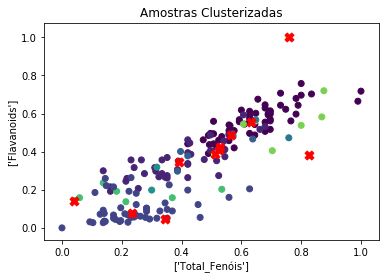

In [176]:
desenha_grafico(df['Total_Fenóis'], df['Flavanoids'], cluster_centers['Total_Fenóis'], cluster_centers['Flavanoids'], 
                agrupador.labels_, "Amostras Clusterizadas")

In [177]:
bandwidth = estimate_bandwidth(df, quantile=0.2)
agrupador = MeanShift(bandwidth = bandwidth,bin_seeding=True)
agrupador.fit(df)
labels = agrupador.labels_
cluster_centers = pd.DataFrame(agrupador.cluster_centers_)
cluster_centers.columns = colunas
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Mais uma vez, depende muito do conhecimento do especialista sobre os dados. Podemos ver abaixo 

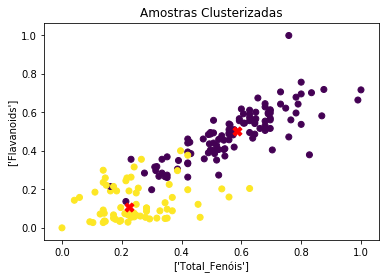

In [178]:
desenha_grafico(df['Total_Fenóis'], df['Flavanoids'], cluster_centers['Total_Fenóis'], cluster_centers['Flavanoids'], 
                agrupador.labels_, "Amostras Clusterizadas")

# Coeficiente de Silhueta

O coeficiente de silhueta mede o quanto um objeto é semelhante ao seu próprio cluster (coesão) e diferente dos demais clústeres. Basicamente, ele mede a diferença entre a distância média entre um ponto referido a um grupo e o seu grupo vizinho. Quanto maior for essa diferença, melhor e mais bem definidos estão os clústeres. O critério de distância utilizado pode ser qualquer um, distância euclidiana e afins.

In [179]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [i for i in range(2,10)]

In [180]:
silhouette_values = []
for cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=cluster, random_state=10) #random state para inicializar sempre no mesmo local
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_values.append(silhouette_avg)

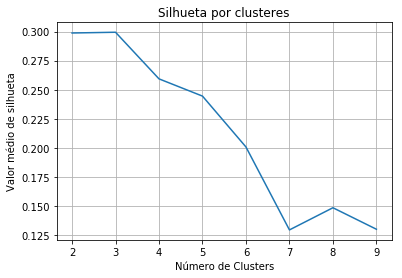

In [181]:
silhouette_values
plt.plot(range_n_clusters, silhouette_values)
plt.xlabel("Número de Clusters")
plt.ylabel("Valor médio de silhueta")
plt.title("Silhueta por clusteres")
plt.grid()
plt.show()

Para n_clusters = 2 O valor médio do coeficiente de silhueta é : 0.2987221815974774
Para n_clusters = 3 O valor médio do coeficiente de silhueta é : 0.29936674064895064
Para n_clusters = 4 O valor médio do coeficiente de silhueta é : 0.2593013081249243
Para n_clusters = 5 O valor médio do coeficiente de silhueta é : 0.24448273514678986
Para n_clusters = 6 O valor médio do coeficiente de silhueta é : 0.20076801510460482


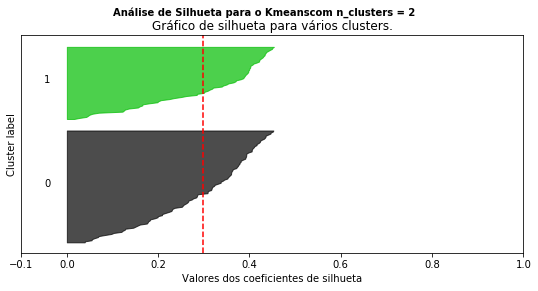

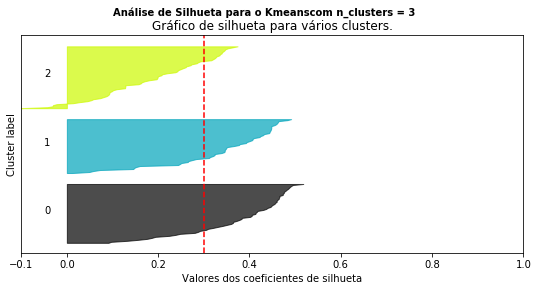

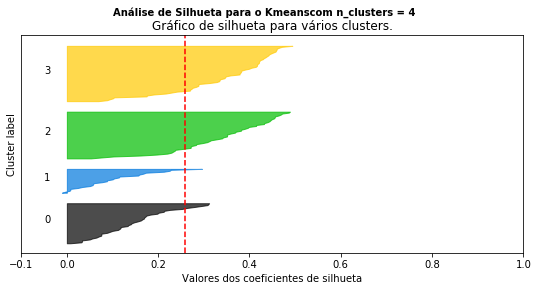

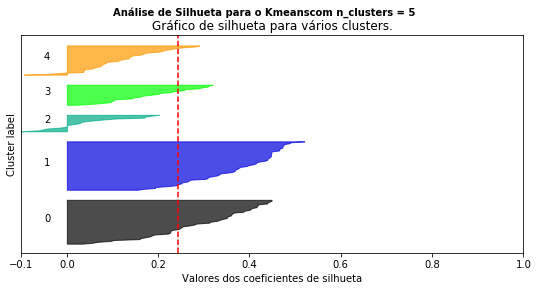

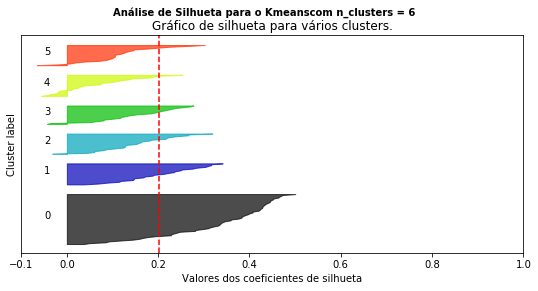

In [182]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]
X = df
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O valor médio do coeficiente de silhueta é :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de silhueta para vários clusters.")
    ax1.set_xlabel("Valores dos coeficientes de silhueta")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Análise de Silhueta para o Kmeans"
                  "com n_clusters = %d" % n_clusters),
                 fontsize=10, fontweight='bold')
plt.show()


A análise de silhueta também pode ser aplicada no DBSCAN, alterando-se o valor de epsilon.

In [183]:
silhouette_values = []
range_eps = np.linspace(0.01, 2, 100)
true_eps = []
for eps in range_eps:
    clusterer =  DBSCAN(eps = eps, min_samples = 15, metric = 'l2') #random state para inicializar sempre no mesmo local
    cluster_labels = clusterer.fit_predict(df)
    if((len(set(cluster_labels))-(1 if -1 in labels else 0))>1):
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_values.append(silhouette_avg)
        true_eps.append(eps)

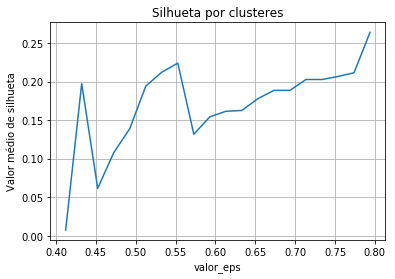

In [184]:
silhouette_values
plt.plot(true_eps, silhouette_values)
plt.xlabel("valor_eps")
plt.ylabel("Valor médio de silhueta")
plt.title("Silhueta por clusteres")
plt.grid()

## SIlhueta para o DBSCAN

In [196]:
silhouette_values = []
range_eps = np.linspace(0.01, 2, 100)
range_min_samples = np.linspace(1,100,100)
true_eps = []
true_min_samples = []
for min_samples in range_min_samples:
    for eps in range_eps:
        clusterer =  DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan') #random state para inicializar sempre no mesmo local
        cluster_labels = clusterer.fit_predict(df)
        n_clusters = (len(set(cluster_labels))-(1 if -1 in cluster_labels else 0))
        if(n_clusters > 1 and n_clusters < 178):
            silhouette_avg = silhouette_score(df, cluster_labels)
            silhouette_values.append(silhouette_avg)
            true_eps.append(eps)
            true_min_samples.append(min_samples)

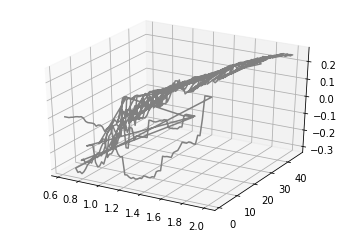

Máximo valor de silhueta está no índice:  (array([741]),)


In [197]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(true_eps, true_min_samples, silhouette_values, 'gray')
plt.show()
print("Máximo valor de silhueta está no índice: ", np.where(silhouette_values == max(silhouette_values)))

Portanto, os valores de eps e true_min_samples para a melhor silhueta são:

In [198]:
true_eps[741]

1.9396969696969697

In [199]:
clusterer =  DBSCAN(eps = true_eps[741], min_samples = true_min_samples[741], metric = 'manhattan') #random state para inicializar sempre no mesmo local
cluster_labels = clusterer.fit_predict(df)
cluster_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [203]:
cluster_labels = [label if label == 0 else 2 for label in cluster_labels]
print("Porcentagem de acertos igual a", avalia_resultado(np.array(cluster_labels),np.array(labels_df)))

Porcentagem de acertos igual a 65.73033707865167


## Silhueta para o Meanshift

In [189]:
silhouette_values = []
range_quantile = np.linspace(0.1, 0.8, 100)
true_quantile = []
true_min_samples = []
for quantile in range_quantile:
    bandwidth = estimate_bandwidth(df, quantile=quantile)
    agrupador = MeanShift(bandwidth = bandwidth,bin_seeding=True)
    agrupador.fit(df)
    cluster_labels = agrupador.labels_   
    n_clusters = (len(set(cluster_labels))-(1 if -1 in cluster_labels else 0))
    if(n_clusters > 1 and n_clusters < 178):
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_values.append(silhouette_avg)
        true_quantile.append(quantile)

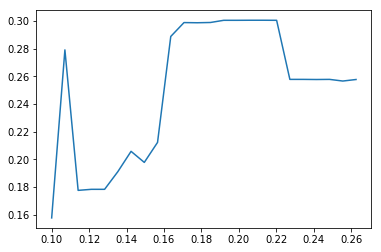

(array([15, 16]),)


In [190]:
plt.plot(true_quantile,silhouette_values)
plt.show()
print(np.where(silhouette_values == max(silhouette_values)))

In [191]:
bandwidth = estimate_bandwidth(df, quantile=true_quantile[15])
agrupador = MeanShift(bandwidth = bandwidth,bin_seeding=True)
agrupador.fit(df)
cluster_labels = agrupador.labels_
cluster_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [192]:
cluster_labels = [label if label == 0 else 2 for label in agrupador.labels_]
print("Porcentagem de acertos igual a", avalia_resultado(np.array(cluster_labels),np.array(labels_df)))

Porcentagem de acertos igual a 64.04494382022472




# K-Means Minibatch (bonus)

O K-means minibatch é uma forma de implementação do K-means que utiliza para convergência uma abordagem de gradiente-descente (otimizador), ao invés do algoritmo clássico. Além disso, ele atualiza várias amostras (batchs) de uma vez, ao invés de uma a uma, o que acelera drasticamente a convergência do algoritmo, a aumenta a escalabilidade do k-means, possibilitando sua aplicação em um maior volume de dados com mais clústeres. No nosso caso, onde não existem tantos dados e tantos clústeres, o resultado não apresenta tanta diferença. Para o caso no qual a quantidade de dados é grande e a quantidade de clústeres também, a diferença de tempo de convergência se torna muito grande.

O tamanho do batch a ser escolhido deve ser compatível com a quantidade dos dados. No nosso caso, foi escolhido batch com 4 dados.

In [28]:
from sklearn.cluster import MiniBatchKMeans
agrupador = MiniBatchKMeans(n_clusters=3, batch_size=4, random_state = 4) #random state = 4 para ficar sempre dando o mesmo resultado
agrupador.fit(df)
labels_mini_batch = agrupador.labels_
labels_mini_batch = troca_label(labels_mini_batch, 0, 2, 1)
print(agrupador.labels_)
print("Porcentagem de acertos igual a", avalia_resultado(np.array(labels_mini_batch),np.array(labels_df)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
1
2
3
4
5
Porcentagem de acertos igual a 96.62921348314607


Como podemos perceber, a diferença no resultado é bem pequena. Principalmente na fronteira que separa os clústeres. Para o caso utilizado agora, obtivemos uma porcentagem de acerto ainda maior que a do K-means tradicional. Isso porque a divisão em batchs diminui a têndencia do algoritmo K-means de convergir para um mínimo local.

# K-Medoids

Como vimos, o K-means não tem um desempenho legal na presença dos Outliers, os famosos pontos fora da curva. Isso porque a média é muito sensível a outliers. Mesmo fazendo uma remoção da grande maioria deles, é sempre uma dúvida até que ponto o que está sendo removido é outlier ou não, podendo tornar a clusterização algo bem sensível. A biblioteca que utilizaremos, pyclustering, possui várias ferramentas de clusterização disponíveis. Diferentemente do Scikit learn, ela não apresenta as respostas de uma maneira tão simples assim, como veremos a seguir. De tal modo, devemos aplicar algumas mudanças na forma de apresentação dos resultados para podermos comparar com o os resultados gerados pelo K-means.

In [66]:
from pyclustering.cluster.kmedoids import kmedoids
kmedoids_instance = kmedoids(np.array(df),[25, 80, 158]) #os medoids do k-medoids devem ser inicializados.
#É prática comum dividirmos os dados em "k" partes e pegarmos um de cada parte para ser a medoid inicial
kmedoids_instance.process() #processando o modelo
clusters = kmedoids_instance.get_clusters() 
medoids = kmedoids_instance.get_medoids()
print(clusters)
print(medoids)
labels_kmedoids = np.zeros((len(df),1))
for i in range(3):
  num_it = len(clusters[i])
  for j in range(num_it):
    if(i == 0):
      labels_kmedoids[clusters[i][j]] = 0
    if(i == 1): 
      labels_kmedoids[clusters[i][j]] = 1
    if(i == 2):
      labels_kmedoids[clusters[i][j]] = 2

labels_kmedoids = np.reshape(labels_kmedoids, labels_df.shape)
print("Porcentagem de acertos igual a", avalia_resultado(np.array(labels_kmedoids),np.array(labels_df)))      


[[57, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 39, 40, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 73, 121], [81, 21, 22, 23, 24, 29, 35, 38, 41, 43, 44, 59, 62, 63, 64, 65, 66, 67, 69, 71, 72, 74, 75, 76, 77, 78, 79, 80, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129], [148, 60, 61, 68, 70, 83, 92, 118, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]]
[57, 81, 148]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
Porcentagem de acertos igual a 89.32584269662921


Como vimos, a porcentagem de acertos foi inferior ao K-means. Para entendermos um pouco melhor o motivo disso, vamos visualizar as projeções dos agrupamentos, assim como fizemos no exemplo do K-means.

In [67]:
df.head()

,Alcool,Malic_Acid,Pó,Ash_Alcanity,Magnésio,Total_Fenóis,Flavanoids,Fenóis_nãoflavlonóides,Proanthocyanins,Intensidade de cor,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


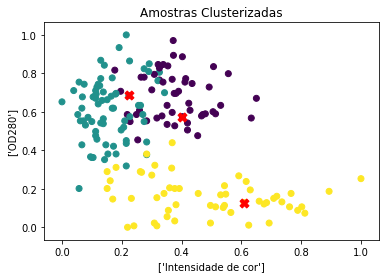

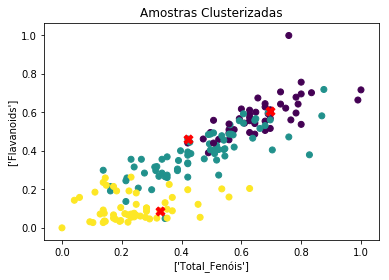

In [68]:
meds = pd.DataFrame((np.array([df.iloc[medoids[0]], df.iloc[medoids[1]], df.iloc[medoids[2]]])),columns = colunas) #medoids finais


desenha_grafico(df['Intensidade de cor'], df['OD280'], meds['Intensidade de cor'], meds['OD280'], 
               np.squeeze(labels_kmedoids), "Amostras Clusterizadas")


desenha_grafico(df['Total_Fenóis'], df['Flavanoids'], meds['Total_Fenóis'], meds['Flavanoids'], 
                np.squeeze(labels_kmedoids), "Amostras Clusterizadas")



### K-means++ como forma de inicialização do K-medoids

Como é possível perceber, diferentemente do K-means, o K-medoids seleciona um ponto como o centro do clúster. Esse ponto selecionado é chamado de Medoid. Assim como o K-means, o K-medoids é sensível ao ponto de inicialização do dado. Baseado nisso, podemos utilizar K-means ++ para dar os pontos iniciais do K-medoids. Isso porque o K-means ++ retorna um dado como o ponto de referência do cluster (um medoid) e não uma centroid.

In [77]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
centers = pd.DataFrame(kmeans_plusplus_initializer(df, 3, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize())
centers.columns = colunas

#teste = pd.DataFrame(kmeans_plusplus_initializer(df, 3,
#                                                 kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize(return_index = True))


print(centers)

medoid_init = [0, 0, 0]
medoid_dist = [100, 100, 100]
#buscando o medoid mais próximo
for i in range(len(df)):
    if(medoid_dist[0] > (sum((df.iloc[i]-centers.iloc[0])**2)**0.5)):
        medoid_dist[0] = (sum((df.iloc[i]-centers.iloc[0])**2)**0.5)
        medoid_init[0] = i
    if(medoid_dist[1] > (sum((df.iloc[i]-centers.iloc[1])**2)**0.5)):
        medoid_dist[1] = (sum((df.iloc[i]-centers.iloc[1])**2)**0.5)
        medoid_init[1] = i
    if(medoid_dist[2] > (sum((df.iloc[i]-centers.iloc[2])**2)**0.5)):
        medoid_dist[2] = (sum((df.iloc[i]-centers.iloc[2])**2)**0.5)
        medoid_init[2] = i


     Alcool  Malic_Acid        Pó  Ash_Alcanity  Magnésio  Total_Fenóis  \
0  0.192105    0.383399  0.834225      0.484536  0.358696      0.265517   
1  0.878947    0.239130  0.609626      0.319588  0.467391      0.989655   
2  0.310526    0.088933  0.208556      0.319588  0.880435      0.300000   

   Flavanoids  Fenóis_nãoflavlonóides  Proanthocyanins  Intensidade de cor  \
0    0.356540                0.886792         0.201893            0.215017   
1    0.664557                0.207547         0.558360            0.556314   
2    0.198312                0.018868         0.659306            0.133959   

        Hue     OD280   Proline  
0  0.609756  0.450549  0.234665  
1  0.308943  0.798535  0.857347  
2  0.650407  0.659341  0.313837  


In [78]:
print(medoid_init)
medoid_init = np.sort(np.array(medoid_init))

[112, 3, 69]


In [79]:
def kmedoids_automatico(df,medoid_init, labels_df):
    kmedoids_instance = kmedoids(np.array(df),medoid_init) #os medoids do k-medoids devem ser inicializados.
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters() 
    medoids = kmedoids_instance.get_medoids()
    print(clusters)
    print(medoids)
    labels_kmedoids = np.zeros((len(df),1))
    for i in range(3):
      num_it = len(clusters[i])
      for j in range(num_it):
        if(i == 0):
          labels_kmedoids[clusters[i][j]] = 0
        if(i == 1): 
          labels_kmedoids[clusters[i][j]] = 1
        if(i == 2):
          labels_kmedoids[clusters[i][j]] = 2

    labels_kmedoids = np.reshape(labels_kmedoids, labels_df.shape)
    print("Porcentagem de acertos igual a", avalia_resultado(np.array(labels_kmedoids),np.array(labels_df)))     

Fazendo o teste novamente....

In [80]:
kmedoids_automatico(df,medoid_init, labels_df)


[[48, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 66, 73, 95, 98], [117, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], [148, 61, 83, 118, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]]
[48, 117, 148]
0
1
2
3
4
5
6
Porcentagem de acertos igual a 96.06741573033707


Como é possível perceber, a escolha inteligente da inicialização dos medoids melhorou a precisão do nosso algoritmo. Todavia, ainda ficamos enviezados a questão aleatória do método, podendo levar a resultados melhores ou piores.

### Removendo o atributo com alto grau de correlação

Para primeira análise, iremos manter os medoids utilizados no exemplo anterior

In [82]:
kmedoids_automatico(df2,medoid_init, labels_df)     


[[48, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 42, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 73, 95, 158, 159], [81, 1, 21, 22, 23, 24, 27, 37, 38, 41, 43, 44, 59, 62, 63, 64, 65, 66, 67, 69, 71, 72, 74, 75, 76, 78, 79, 80, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128], [163, 60, 61, 68, 70, 77, 83, 92, 107, 112, 118, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]]
[48, 81, 163]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Porcentagem de acertos igual a 85.39325842696628


Para esses parâmetros de inicialização, o resultado não foi bom.

## Tarefa K-medoids

Como tarefa, recalcule os medoids iniciais utilizando o algoritmo k-means++ para os dados df2, no qual removemos um atributo. Após isso, execute mais uma vez o K-medoids. A precisão melhorou?

Repita o exercício acima utilizando os dados que você utilizou na tarefa final do K-means, isto é, aquele nos quais você removeu mais atributos com alto grau de correlação.

## Mostrar apresentação K-medoids power point, apresentando o conceito geral, vantagens e desvantagens.

# K-medians

Se o K-medoids tem uma inércia grande, o que facilita ainda mais sua convergência para um mínimo local, uma boa saida pode ser o K-medians. Ele é menos sensível a ruído que o K-means e mais maleável que o K-medoids.

In [84]:
from pyclustering.cluster.kmedians import kmedians

In [85]:
# Criando instâncias do algoritmo K-Medians algorithm
medianas_iniciais = [np.array(df.iloc[1]), np.array(df.iloc[50]), np.array(df.iloc[120])] #medianas iniciais
kmedians_instance = kmedians(np.array(df), medianas_iniciais) #cria a instância do modelo
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()


In [83]:
labels_kmedians = np.zeros((len(df),1))
for i in range(3):
  num_it = len(clusters[i])
  for j in range(num_it):
    if(i == 0):
      labels_kmedians[clusters[i][j]] = 0
    if(i == 1): 
      labels_kmedians[clusters[i][j]] = 1
    if(i == 2):
      labels_kmedians[clusters[i][j]] = 2

from sklearn import metrics
labels_kmedians = np.reshape(labels_kmedoids, labels_df.shape)


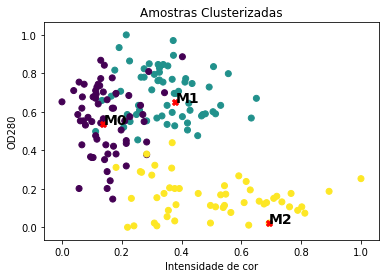

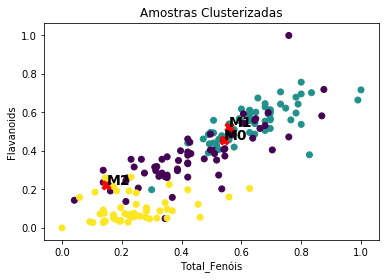

In [35]:
medians = pd.DataFrame((np.array([medians[0], medians[1], medians[2]])),columns = colunas)
medians.head()
plt.scatter(df['Intensidade de cor'], df['OD280'], c = agrupador.labels_.astype(np.float))
plt.scatter(meds['Intensidade de cor'], medians['OD280'], c = 'r', marker = 'X')
plt.text(medians['Intensidade de cor'].iloc[0], medians['OD280'].iloc[0], 'M0', fontsize=14, fontweight='bold')
plt.text(medians['Intensidade de cor'].iloc[1], medians['OD280'].iloc[1], 'M1', fontsize=14, fontweight='bold')
plt.text(medians['Intensidade de cor'].iloc[2], medians['OD280'].iloc[2], 'M2', fontsize=14, fontweight='bold')
plt.xlabel('Intensidade de cor')
plt.ylabel('OD280')
plt.title('Amostras Clusterizadas')
plt.show()

plt.scatter(df['Total_Fenóis'], df['Flavanoids'], c = agrupador.labels_.astype(np.float))
plt.scatter(medians['Total_Fenóis'], medians['Flavanoids'], c = 'r', marker = 'X', s = 80)
plt.text(medians['Total_Fenóis'].iloc[0], medians['Flavanoids'].iloc[0], 'M0', fontsize=14, fontweight='bold')
plt.text(medians['Total_Fenóis'].iloc[1], medians['Flavanoids'].iloc[1], 'M1', fontsize=14, fontweight='bold')
plt.text(medians['Total_Fenóis'].iloc[2], medians['Flavanoids'].iloc[2], 'M2', fontsize=14, fontweight='bold')
plt.xlabel('Total_Fenóis')
plt.ylabel('Flavanoids')
plt.title('Amostras Clusterizadas')
plt.show()

# X-means (ADICIONAR)

# Silhouette Coefficient

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [i for i in range(2,10)]

In [57]:
range_n_clusters = [i for i in range(2,10)]
silhouette_values = []
for cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=cluster, random_state=10) #random state para inicializar sempre no mesmo local
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_values.append(silhouette_avg)


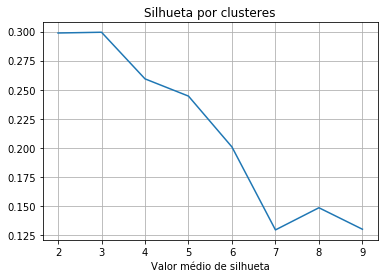

In [61]:
silhouette_values
plt.plot(range_n_clusters, silhouette_values)
plt.xlabel("Número de Clusters")
plt.ylabel("Valor médio de silhueta")
plt.title("Silhueta por clusteres")
plt.grid()
plt.show()

# Davies-Boundin Index

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarn

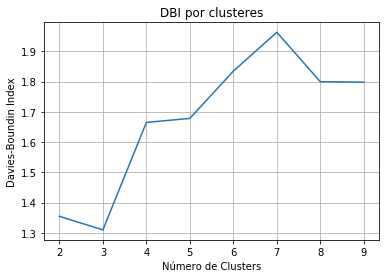

In [64]:
from sklearn.metrics import davies_bouldin_score
range_n_clusters = [i for i in range(2,10)]
dbs_values = []
for cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=cluster, random_state=10) #random state para inicializar sempre no mesmo local
    cluster_labels = clusterer.fit_predict(df)
    dbs = davies_bouldin_score(df, cluster_labels)
    dbs_values.append(dbs)

    
plt.plot(range_n_clusters, dbs_values)
plt.xlabel("Número de Clusters")
plt.ylabel("Davies-Boundin Index")
plt.title("DBI por clusteres")
plt.grid()
plt.show()
    
    